In [1]:
# import packages used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data using pandas
data = pd.read_csv("downloads/testdata.csv", delimiter=",", header=0)

In [3]:
# check how many features
data.columns

Index(['labelsC2', 'g.s', 'g.p', 'g.pdm', 'g.pdsd', 'g.effr', 'g.acirc',
       'g.sf', 'g.theta', 'g.l1',
       ...
       'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24'],
      dtype='object', length=116)

In [4]:
# check how many labels
data['labelsC2'].unique()

array(['b', 'l', 'o', 'a', 'c'], dtype=object)

In [5]:
# X: 115 features
# y: 5 labels
X = data.iloc[:, data.columns != 'labelsC2'].values
y = data.iloc[:, 0].values
print(X.shape, y.shape)

(5465, 115) (5465,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
# spilt data into Training set (75%) and Test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# scale the features (float)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# fitting the classifier with the training set
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [10]:
# predicting the test set results
Y_pred = rfc.predict(X_test)

In [11]:
# confusion matrix
# https://en.wikipedia.org/wiki/Confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[250,   6,   2,  10,   5],
       [  8, 164,   9,  14,  28],
       [  2,   4, 360,   7,   0],
       [  4,  25,   9, 194,   2],
       [  4,  21,   3,   6, 230]])

In [12]:
# check the accuracy etc.
print(classification_report(
    y_true=y_test,
    y_pred=Y_pred,
    ))

              precision    recall  f1-score   support

           a       0.93      0.92      0.92       273
           b       0.75      0.74      0.74       223
           c       0.94      0.97      0.95       373
           l       0.84      0.83      0.83       234
           o       0.87      0.87      0.87       264

    accuracy                           0.88      1367
   macro avg       0.87      0.86      0.86      1367
weighted avg       0.88      0.88      0.88      1367



In [13]:
#Standardising features
x = StandardScaler().fit_transform(X)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_data = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_data,data[['labelsC2']]],axis=1)

finaldf.head()

,pc1,pc2,labelsC2
0,-2.245728,-2.660585,b
1,-1.154705,-4.323092,b
2,-3.092222,-3.974759,l
3,-3.331724,-5.977517,l
4,-2.450911,-4.403970,l


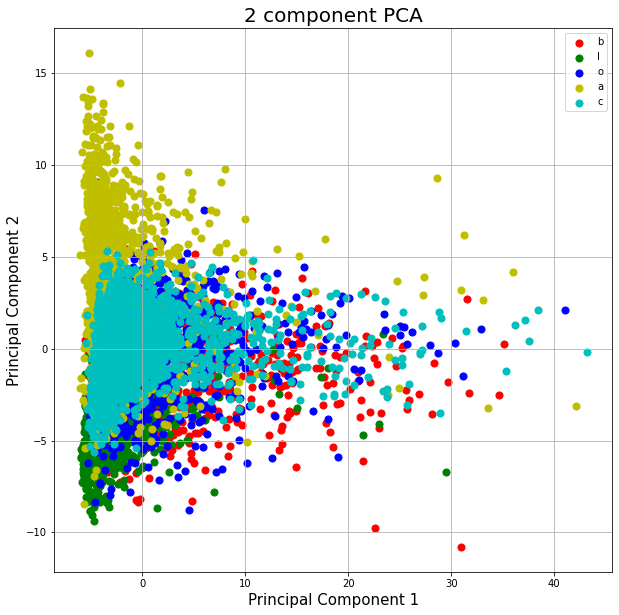

In [15]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['b', 'l', 'o','a','c']
colors = ['r', 'g', 'b','y','c']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['labelsC2'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
pca.explained_variance_ratio_

array([0.31254403, 0.12196628])